Data preprocessing is the process of converting or mapping data from one “raw” form into another format to make it ready for further analysis.

In [49]:
#Dealing with missing values

import pandas as pd
import numpy as np

url = '/content/imports-85.data'
df = pd.read_csv(url, header= None)
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.shape

(205, 26)

In [50]:
df_DeleteMissing = df.copy()
df_ReplaceMissing = df.copy()

#Delete missing values
df_DeleteMissing["normalized-losses"] = pd.to_numeric(df_DeleteMissing["normalized-losses"], errors='coerce')
df_DeleteMissing.dropna(subset=["normalized-losses"], axis=0, inplace=True)
df_DeleteMissing.shape

(164, 26)

In [51]:
df_ReplaceMissing["normalized-losses"] = pd.to_numeric(df_ReplaceMissing["normalized-losses"], errors='coerce')
mean = df_ReplaceMissing["normalized-losses"].mean()
print(mean)
df_ReplaceMissing = df_ReplaceMissing.replace(np.nan, mean)
df_ReplaceMissing.head()

122.0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [52]:
#Data formatting

df["city-mpg"] = 235 / df["city-mpg"]
df.rename(columns={"city-mpg": "city-L100km"}, inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450


In [63]:
#Data normalization

df2 = pd.read_csv(url, header= None)
df2.columns = headers
df3 = pd.read_csv(url, header= None)
df3.columns = headers
df4 = pd.read_csv(url, header= None)
df4.columns = headers

#Simple feature scaling
df2["length"] = df2["length"] / df2["length"].max()
print(df2["length"])
print("------------")

#Min-Max
df3["length"] = (df3["length"]-df3["length"].min()) / (df3["length"].max()-df3["length"].min())
print(df3["length"])
print("------------")

#Z-score
df4["length"] = (df4["length"]-df4["length"].mean())/df4["length"].std()
print(df4["length"])
print("------------")

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64
------------
0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 205, dtype: float64
------------
0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64
------------


In [64]:
#Binning

df2["price"] = pd.to_numeric(df2["price"], errors='coerce')
df2.dropna(subset=["price"], axis=0, inplace=True)
bins = np.linspace(min(df2["price"]), max(df2["price"]), 4)
group_names = ["Low", "Medium", "High"]
df2["price-binned"] = pd.cut(df2["price"], bins, labels=group_names, include_lowest=True)

df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Low
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Low
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Low
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Low


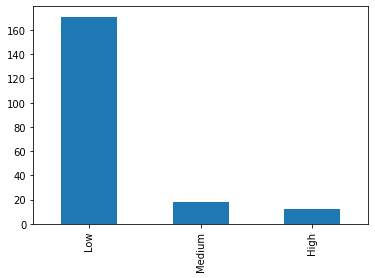

In [71]:
df2["price-binned"].value_counts().plot.bar()

In [74]:
#Turn categorical variables into quantitative variables

 #One hot encoding

pd.get_dummies(df3["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0
